<a href="https://colab.research.google.com/github/A01732830/Entregable-3/blob/main/Modelo4_last_mile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde archivo .csv sin indice
data=pd.read_csv("lastmile_delivery_operations_mit_lift_lab_horas_como_numeros.csv")
data.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,arrival_of_the_freight_vehicle,plates,company_if_visible,...,used_traffic_cone,vehicles_unloading_door,number_of_available_trolleys,serving_customer,garage_blocking,accident,describe_the_accident,noise,traffic_congestion,maximum_number_of_vehicles_in_the_traffic_jam
0,4408a234-9585-46fe-9b16-96c0faaf6db8,73 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 22:15:04 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2334894708 19.0568933787),19.056893,-98.233489,140000.0,KB-7050-A,Ricolino,...,no,Side,1,NaN,yes,no,NaN,no,no,NaN
1,673cd0e3-7290-4c4d-a57f-096d16b78141,72 Calle Almolonga\nPuebla de Zaragoza PUE 721...,2022-11-12 20:41:39 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.233483903 19.0568494313),19.056849,-98.233484,135000.0,XC8687A,Marinela,...,no,Rear,1,NaN,no,no,NaN,no,no,NaN
2,04e64464-3fbd-4ce1-99d8-5364e1567e8c,4510 Vía Volkswagen\nHeroica Puebla de Zaragoz...,2022-11-12 18:02:57 UTC,Juan Carlos Bejarano Moreno,SRID=4326;POINT(-98.2339161 19.0596775),19.059677,-98.233916,114700.0,SM 20745,La fete,...,no,Side,0,1.0,no,no,NaN,no,no,NaN
3,d0a6568d-cf8f-48fd-ad3d-007e79f4ae6b,4501A Avenida 2 Poniente\nHeroica Puebla de Za...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.2285674 19.0626948),19.062695,-98.228567,114500.0,SP35169,Barcel,...,no,Rear,2,NaN,yes,no,NaN,no,no,NaN
4,eff15823-b1f2-4e82-afb2-2195635d1406,4717 Avenida Reforma\nHeroica Puebla de Zarago...,2022-11-12 17:55:44 UTC,Luis Gerardo Ramírez Lastra,SRID=4326;POINT(-98.231397 19.0627239),19.062724,-98.231397,114100.0,SN89460,NaN,...,no,Rear,2,NaN,no,no,NaN,no,no,NaN


In [ ]:
#Rellenamos nulos

df =data.fillna(method="bfill")
df =data.fillna(method="ffill")

Primer caso

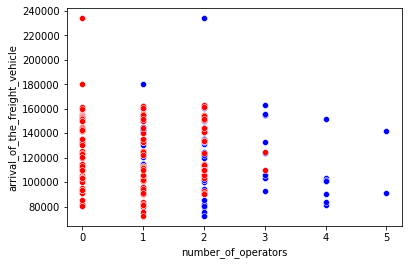

In [ ]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='number_of_operators', y='arrival_of_the_freight_vehicle', color="blue", data=df)
sns.scatterplot(x='number_of_available_trolleys', y='arrival_of_the_freight_vehicle', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_operators', 'number_of_available_trolleys']]
Var_Dep= df['arrival_of_the_freight_vehicle']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelo= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(modelo)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
modelo.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
modelo.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_operators', 'number_of_available_trolleys'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([-3140.78035392,  -789.00741695]),
 '_residues': 112610077254.31425,
 'rank_': 2,
 'singular_': array([12.36016958,  8.77345204]),
 'intercept_': 125864.20835291843}

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
modelo.score(Vars_Indep,Var_Dep)

0.013401828590544063

**MODELO PREDICTIVO**



In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= modelo.predict(X=df[['number_of_operators', 'number_of_available_trolleys']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

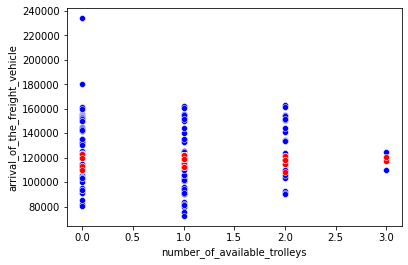

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_available_trolleys', y='arrival_of_the_freight_vehicle', color="blue", data=df)
sns.scatterplot(x='number_of_available_trolleys', y='Predicciones', color="red", data=df)
#sns.lineplot(x='268_number_fridges', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=modelo.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.013401828590544063

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1157662670666376